In [13]:
#import packages
import pandas as pd
import numpy as np
import time
import webbrowser
import pickle
from datetime import date
import os

In [14]:
url = 'https://app.datacamp.com/learn/courses/working-with-dates-and-times-in-python'

# Open URL in a new tab, if a browser window is already open.
webbrowser.open_new_tab(url)

True

In [16]:
# making data frame  
capital_one_bike = pd.read_csv("https://assets.datacamp.com/production/repositories/3551/datasets/181c142c56d3b83112dfc16fbd933fd995e80f94/capital-onebike.csv")  

infile = open('datasets/florida_hurricane_dates.pkl','rb')
hurricane = pickle.load(infile)
infile.close()

#obj = pd.read_pickle(r'datasets/florida_hurricane_dates.pkl')

In [17]:
print(capital_one_bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Start date            290 non-null    object
 1   End date              290 non-null    object
 2   Start station number  290 non-null    int64 
 3   Start station         290 non-null    object
 4   End station number    290 non-null    int64 
 5   End station           290 non-null    object
 6   Bike number           290 non-null    object
 7   Member type           290 non-null    object
dtypes: int64(2), object(6)
memory usage: 18.2+ KB
None


In [26]:
path = os.getcwd()

print(path)

with open('/Users/anitaowens/Documents/GitHub/Data-with-Python/datasets/florida_hurricane_dates.pkl', 'rb') as f:
     hurricane = pickle.load(f)

/Users/anitaowens/Documents/GitHub/Data-with-Python


In [ ]:
print(hurricane)

## Chapter 1 Dates and Calendars

In [28]:
# Create a date object
hurricane_andrew = date(1992,8,24)

In [29]:
# Which day of the week is the date?
print(hurricane_andrew.weekday())

0


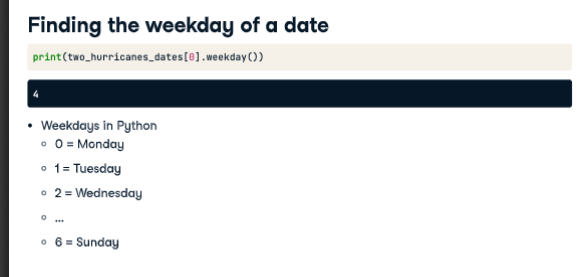

Atlantic hurricane season officially begins on June 1. How many hurricanes since 1950 have made landfall in Florida before the official start of hurricane season?

In [ ]:
# Counter for how many before June 1
early_hurricanes = 0

# We loop over the dates
for hurricane in florida_hurricane_dates:
  # Check if the month is before June (month number 6)
  if hurricane.month < 6:
    early_hurricanes = early_hurricanes + 1
    
print(early_hurricanes)

#### Turning dates into strings

In [15]:
d = date(2017, 11,5)

#ISO Format: YYYY-MM-DD
print(d)

2017-11-05


In [16]:
#Express the date in ISO 8601 format and put it in a list
print([d.isoformat()])

['2017-11-05']


In [17]:
some_dates = ['2000-01-01', '1999-12-31']

#Dates in ISO format sort correctly
print(sorted(some_dates))

['1999-12-31', '2000-01-01']


If you don't want to format dates in ISO format, use the strftime method.

In [18]:
d = date(2017, 1,5)
print(d.strftime("%Y"))

2017


In [19]:
#Format string with more text in it
print(d.strftime("Year is %Y"))

Year is 2017


In [20]:
#Format: YYYY/MM/DD
print(d.strftime("%Y/%m/%d"))

2017/01/05


# Chapter 2 Combing Dates and Times

In [30]:
# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017, 10, 1, 15, 26, 26)

# Print the results in ISO 8601 format
print([dt.isoformat()])

['2017-10-01T15:26:26']


In [31]:
# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017, 12, 31, 15, 19, 13)

# Print the results in ISO 8601 format
print([dt.isoformat()])

['2017-12-31T15:19:13']


In [32]:
# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017, 12, 31, 15, 19, 13)

# Replace the year with 1917
dt_old = dt.replace(year=1917)

# Print the results in ISO 8601 format
print(dt_old)

1917-12-31 15:19:13


In this chapter, you will be working with a list of all bike trips for one Capital Bikeshare bike, W20529, from October 1, 2017 to December 31, 2017. This list has been loaded as onebike_datetimes.

In [ ]:
#Counting events before and after noon
# Create dictionary to hold results
trip_counts = {'AM': 0, 'PM': 0}
  
# Loop over all trips
for trip in onebike_datetimes:
  # Check to see if the trip starts before noon
  if trip['start'].hour < 12:
    # Increment the counter for before noon
    trip_counts['AM'] += 1
  else:
    # Increment the counter for after noon
    trip_counts['PM'] += 1
  
print(trip_counts)

In [1]:
#Unix timestamps
# Import datetime
from datetime import datetime

# Starting timestamps
timestamps = [1514665153, 1514664543]

# Datetime objects
dts = []

# Loop
for ts in timestamps:
  dts.append(datetime.fromtimestamp(ts))
  
# Print results
print(dts)

[datetime.datetime(2017, 12, 30, 21, 19, 13), datetime.datetime(2017, 12, 30, 21, 9, 3)]


Nice! The largest number that some older computers can hold in one variable is 2147483648, which as a Unix timestamp is in January 2038. On that day, many computers which haven't been upgraded will fail. Hopefully, none of them are running anything critical!

## Durations

In [2]:
start = datetime(2017, 10, 8, 23, 46, 47)
end = datetime(2017, 10, 9, 0, 10, 57)
duration = end - start
duration

datetime.timedelta(seconds=1450)

In [3]:
#Creating timedeltas
from datetime import timedelta

delta1 = timedelta(seconds=1)

#One second later
print(start + delta1)

2017-10-08 23:46:48


In [4]:
delta2 = timedelta(days=1, seconds=1)
print(start + delta2)

2017-10-09 23:46:48


In [6]:
#Negative timedeltas
delta3 = timedelta(weeks=-1)
print(start + delta3)

2017-10-01 23:46:47


In [ ]:
# Initialize a list for all the trip durations
onebike_durations = []

for trip in onebike_datetimes:
  # Create a timedelta object corresponding to the length of the trip
  trip_duration = trip['end'] - trip['start']
  
  # Get the total elapsed seconds in trip_duration
  trip_length_seconds = trip_duration.total_seconds()
  
  # Append the results to our list
  onebike_durations.append(trip_length_seconds)
    
onebike_durations

# Time Zones and Daylight Saving

### UTC Offsets

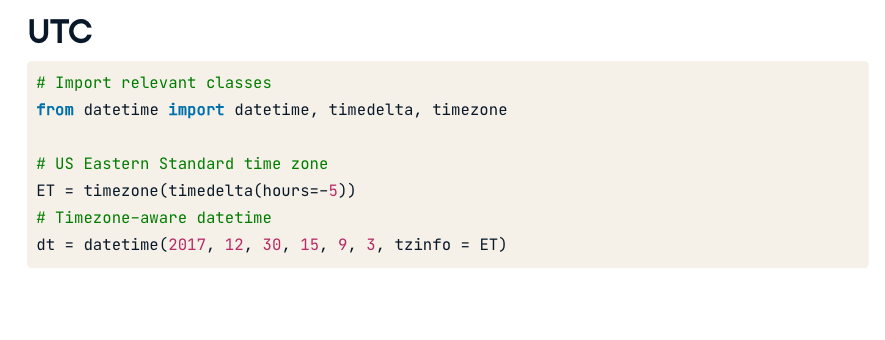

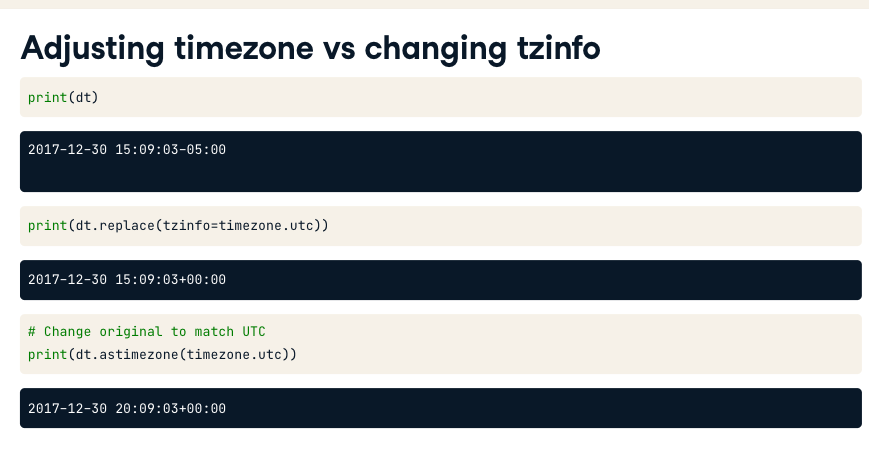